<a href="https://colab.research.google.com/github/harikrishnareddymallavarapu/Masters/blob/main/Masters_LDA_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle
pkl_file = open('drive/My Drive/Top-Ex/data_lemmatized_new.pkl', 'rb')
data_lemmatized = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('drive/My Drive/Top-Ex/dictionary_new.pkl', 'rb')
dictionary = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('drive/My Drive/Top-Ex/corpus_new.pkl', 'rb')
corpus = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('drive/My Drive/Top-Ex/lda_20_new.pkl', 'rb')
lda_model = pickle.load(pkl_file)
pkl_file.close()

In [3]:
j=0
for i in lda_model.show_topics(formatted=False,num_topics=lda_model.num_topics,num_words=len(lda_model.id2word)):
    print(i)
    j+=1
    if j ==10:
      break


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
topic1_list = lda_model.show_topics(formatted=False,num_topics=lda_model.num_topics,num_words=len(lda_model.id2word))[0][1]

In [5]:
import pandas as pd
df = pd.DataFrame(topic1_list, columns=["word", "top1_prob"])
df.head()

,word,top1_prob
0,election,0.038882
1,campaign,0.038024
2,vote,0.028605
3,presidential,0.026779
4,republican,0.021024


In [6]:
df.sort_values(by=['top1_prob'],ascending=False,inplace=True)
df.head()

,word,top1_prob
0,election,0.038882
1,campaign,0.038024
2,vote,0.028605
3,presidential,0.026779
4,republican,0.021024


In [7]:
lda_model.show_topics(formatted=False,num_topics=lda_model.num_topics,num_words=len(lda_model.id2word))[0][1]

[('election', 0.038881935),
 ('campaign', 0.038024098),
 ('vote', 0.028605372),
 ('presidential', 0.02677852),
 ('republican', 0.02102397),
 ('candidate', 0.020461742),
 ('nominee', 0.018362796),
 ('voter', 0.017522262),
 ('democratic', 0.016235003),
 ('win', 0.014778255),
 ('support', 0.013416604),
 ('poll', 0.012686618),
 ('party', 0.011324189),
 ('political', 0.010215011),
 ('debate', 0.0098967925),
 ('race', 0.00936258),
 ('supporter', 0.008608695),
 ('conservative', 0.008551822),
 ('lead', 0.008165998),
 ('state', 0.0077985316),
 ('president', 0.0077737523),
 ('show', 0.007426132),
 ('former', 0.0073340866),
 ('run', 0.00704907),
 ('speech', 0.00656766),
 ('primary', 0.0065348377),
 ('point', 0.006387447),
 ('week', 0.0063683265),
 ('result', 0.005989276),
 ('victory', 0.005949526),
 ('sander', 0.0059439004),
 ('nomination', 0.0058250194),
 ('presidency', 0.0058212983),
 ('hold', 0.0052193403),
 ('rally', 0.005083675),
 ('politic', 0.004933863),
 ('night', 0.0046231416),
 ('elect'

In [8]:
lda_model.get_term_topics("presidential", minimum_probability=0.000000001)

[(0, 0.026734041), (11, 0.00096634286)]

In [9]:
totalDF =pd.DataFrame(columns=["word", "top_prob",'Topic'])
for i in range(20):
  print(i)
  topic_list = lda_model.show_topics(formatted=False,num_topics=lda_model.num_topics,num_words=len(lda_model.id2word))[i][1]
  df = pd.DataFrame(topic_list, columns=["word", "top_prob"])
  df["Topic"]= i+1

  if totalDF.shape==0:
    totalDF = df
  else:
    totalDF= totalDF.append(df)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [10]:
k = totalDF[totalDF.word.isin( ['aaa']) ]

In [48]:
totalDF = totalDF.pivot_table(index=["word"], 
                    columns='Topic', 
                    values='top_prob')

In [51]:
totalDF.reset_index(inplace=True)
totalDF.head()


Topic,word,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,-PRON-,1.168621e-06,1.385042e-07,2.289410e-07,1.430242e-05,2.585179e-06,1.443889e-06,9.681294e-07,2.116907e-07,2.664542e-07,1.259965e-05,2.296629e-07,2.794349e-07,5.925599e-07,1.639674e-07,2.073480e-07,1.569393e-07,4.162362e-07,1.141992e-05,5.967839e-07,1.367818e-07
1,aaa,9.226420e-08,1.623422e-07,4.560191e-07,6.608426e-05,3.017166e-07,3.624007e-07,3.273255e-06,4.583901e-07,6.559599e-07,1.378381e-06,5.597895e-08,1.459746e-07,2.914951e-07,1.609024e-07,7.553031e-07,1.536884e-07,1.391825e-07,4.449075e-06,5.924453e-07,6.118985e-07
2,aaaaaah,1.483336e-07,1.171501e-07,3.782944e-07,2.783550e-07,4.277400e-07,1.390651e-06,1.927580e-07,3.125841e-07,4.387857e-07,1.168249e-07,5.626030e-08,1.152167e-07,9.429738e-08,1.614490e-07,3.395137e-07,2.667020e-07,5.209676e-08,4.310686e-07,1.135986e-06,1.340500e-07
3,aaaahhh,9.081042e-08,9.895501e-08,2.279611e-07,1.781265e-07,3.015439e-07,2.249308e-07,1.228950e-07,7.262869e-08,2.616941e-07,8.433203e-08,3.708839e-08,9.642162e-08,3.083816e-08,1.599752e-07,2.021017e-07,1.144988e-07,3.978587e-08,4.308479e-07,5.918241e-07,1.340359e-07
4,aabb,9.810418e-08,1.112926e-07,1.037798e-06,3.659701e-07,3.139065e-07,4.562739e-07,1.924338e-07,9.793895e-08,2.748371e-07,1.069625e-07,5.161917e-08,9.705528e-08,5.007909e-08,1.639257e-07,2.220911e-07,1.177881e-07,6.504501e-08,4.309177e-07,6.282034e-07,3.127402e-07


In [53]:
totalDF.columns

Index(['word', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20],
      dtype='object', name='Topic')

In [62]:
topic_percs, wordid_topics, wordid_phivalues = lda_model[corpus_1[0]]

In [66]:
lda_model[corpus_1[0]]

([(0, 0.048198137),
  (3, 0.16192202),
  (7, 0.158991),
  (8, 0.070254),
  (9, 0.010995576),
  (11, 0.04187642),
  (12, 0.15460682),
  (16, 0.32125944)],
 [(0, [3, 16, 11]),
  (1, [16, 7, 11, 8]),
  (2, [3, 16, 8, 7, 11, 10, 15]),
  (3, [16, 3]),
  (4, [3, 7, 16]),
  (5, [16, 7, 0]),
  (6, [7, 0, 10]),
  (7, [16, 9, 3, 15]),
  (8, [16, 12, 9]),
  (9, [8, 7, 3, 0]),
  (10, [16, 3, 11]),
  (11, [16]),
  (12, [12, 3, 7, 16]),
  (13, [16, 7, 11, 3]),
  (14, [16, 12, 3, 8]),
  (15, [7, 0]),
  (16, [7, 0, 11]),
  (17, [16, 8, 7, 0]),
  (18, [12, 0, 9, 10, 4]),
  (19, [3, 9]),
  (20, [16, 7, 3, 12, 0, 9]),
  (21, [3, 8, 16, 7, 12, 0, 11, 4, 1]),
  (22, [8, 12, 16, 3, 11]),
  (23, [7, 16, 3, 8, 1, 11, 9]),
  (24, [16, 7, 12, 3, 0]),
  (25, [7, 16, 0, 4]),
  (26, [7, 0, 1]),
  (27, [7, 12, 3, 16, 0]),
  (28, [16, 12, 7, 10, 0]),
  (29, [16, 11, 0, 10]),
  (30, [16, 12, 3]),
  (31, [7]),
  (32, [12, 7]),
  (33, [16, 7, 0, 9, 10]),
  (34, [16, 12, 0]),
  (35, [3, 16, 0]),
  (36, [7, 16, 3, 8]),
 

In [22]:
gamma, _ = lda_model.inference(corpus)
topics = gamma / gamma.sum(axis=1)[:,None]

In [23]:
topics = pd.DataFrame(topics)
topics.reset_index(drop=True)
topics.rename(columns = lambda x: 'Topic_'+str(x+1).zfill(2), inplace=True)
topics.head()

,Topic_01,Topic_02,Topic_03,Topic_04,Topic_05,Topic_06,Topic_07,Topic_08,Topic_09,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20
0,0.067322,0.007678,0.000438,0.243083,0.005309,0.000731,0.006883,0.086805,0.071966,0.001694,0.022597,0.010804,0.133596,0.000640,0.000602,0.005302,0.333108,0.000389,0.000407,0.000643
1,0.021442,0.087206,0.014915,0.002733,0.001883,0.030547,0.009134,0.033421,0.097003,0.045649,0.148593,0.004537,0.140650,0.020172,0.278967,0.007261,0.047378,0.001608,0.001532,0.005370
2,0.004298,0.082594,0.008812,0.003834,0.002370,0.086435,0.010681,0.064172,0.013705,0.022234,0.122880,0.019330,0.175133,0.018992,0.024341,0.189761,0.067170,0.046291,0.036694,0.000275
3,0.014538,0.075287,0.018987,0.000233,0.067784,0.039817,0.006462,0.131653,0.044122,0.004669,0.059677,0.005896,0.221646,0.014398,0.025254,0.213624,0.030434,0.005583,0.019625,0.000310
4,0.001945,0.035472,0.037059,0.000629,0.015938,0.000957,0.001271,0.054531,0.006660,0.001672,0.015477,0.002575,0.177025,0.273508,0.012672,0.002322,0.260723,0.071673,0.002247,0.025643


In [11]:
article1 = pd.read_csv('drive/My Drive/Top-Ex/articles1.csv')

In [26]:
finalData = pd.concat([article1,topics], axis=1,sort=False)
finalData.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,Topic_01,Topic_02,Topic_03,Topic_04,Topic_05,Topic_06,Topic_07,Topic_08,Topic_09,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,0.067322,0.007678,0.000438,0.243083,0.005309,0.000731,0.006883,0.086805,0.071966,0.001694,0.022597,0.010804,0.133596,0.000640,0.000602,0.005302,0.333108,0.000389,0.000407,0.000643
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",0.021442,0.087206,0.014915,0.002733,0.001883,0.030547,0.009134,0.033421,0.097003,0.045649,0.148593,0.004537,0.140650,0.020172,0.278967,0.007261,0.047378,0.001608,0.001532,0.005370
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",0.004298,0.082594,0.008812,0.003834,0.002370,0.086435,0.010681,0.064172,0.013705,0.022234,0.122880,0.019330,0.175133,0.018992,0.024341,0.189761,0.067170,0.046291,0.036694,0.000275
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",0.014538,0.075287,0.018987,0.000233,0.067784,0.039817,0.006462,0.131653,0.044122,0.004669,0.059677,0.005896,0.221646,0.014398,0.025254,0.213624,0.030434,0.005583,0.019625,0.000310
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",0.001945,0.035472,0.037059,0.000629,0.015938,0.000957,0.001271,0.054531,0.006660,0.001672,0.015477,0.002575,0.177025,0.273508,0.012672,0.002322,0.260723,0.071673,0.002247,0.025643


In [28]:
article1.content.iloc[0]

'WASHINGTON  —   Congressional Republicans have a new fear when it comes to their    health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for   and   Americans, handing House Republicans a big victory on    issues. But a sudden loss of the disputed subsidies could conceivably cause the health care program to implode, leaving millions of people without access to health insurance before Republicans have prepared a replacement. That could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government. To stave off that outcome, Republicans could find themselves in the awkward position of appropriating huge sums to temporarily prop up the Obama health care law, angering conservative voters who have been 

In [12]:
%%capture
# Run in python console
import nltk; 
nltk.download('stopwords')

# Run in terminal or command prompt
!python3 -m spacy download en
import gensim

In [13]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import spacy

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [15]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

In [14]:

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts,bigram_mod):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    nlp = spacy.load('en', disable=['parser', 'ner'])
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','trump','donald','say','hillary','clinton','do','united','state','the','day','news','that','have','however','year'])

In [15]:
import re
def createCorpusDict(dataFrame):
    #cleanse the text
    dataFrame.content = dataFrame.content.astype(str)
    data = dataFrame.content.values.tolist()
    data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
    # Remove new line characters
    data = [re.sub('\s+', ' ', sent) for sent in data]
    # Remove distracting single quotes
    data = [re.sub("\'", "", sent) for sent in data]
    data_words = list(sent_to_words(data))
    
    bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
    trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)

    data_words_nostops = remove_stopwords(data_words)

    # Form Bigrams
    data_words_bigrams = make_bigrams(data_words_nostops,bigram_mod)

    # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
    # python3 -m spacy download en


    # Do lemmatization keeping only noun, adj, vb, adv
    data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

    #cleanse the dictionary
    dictionary = corpora.Dictionary(data_lemmatized)
    # Create Corpus
    texts = data_lemmatized
    # Term Document Frequency
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    return corpus,dictionary,data_lemmatized

In [16]:
corpus_1,dictionary_1,data_lemmatized_1 = createCorpusDict(article1[0:1])

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [21]:
totalDF = totalDF.reset_index()
totalDF.head()

Topic,index,word,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0,-PRON-,1.168621e-06,1.168621e-06,1.168621e-06,1.168621e-06,1.168621e-06,1.168621e-06,1.168621e-06,1.168621e-06,1.168621e-06,1.168621e-06,1.168621e-06,1.168621e-06,1.168621e-06,1.168621e-06,1.168621e-06,1.168621e-06,1.168621e-06,1.168621e-06,1.168621e-06,1.168621e-06
1,1,aaa,9.226420e-08,9.226420e-08,9.226420e-08,9.226420e-08,9.226420e-08,9.226420e-08,9.226420e-08,9.226420e-08,9.226420e-08,9.226420e-08,9.226420e-08,9.226420e-08,9.226420e-08,9.226420e-08,9.226420e-08,9.226420e-08,9.226420e-08,9.226420e-08,9.226420e-08,9.226420e-08
2,2,aaaaaah,1.483336e-07,1.483336e-07,1.483336e-07,1.483336e-07,1.483336e-07,1.483336e-07,1.483336e-07,1.483336e-07,1.483336e-07,1.483336e-07,1.483336e-07,1.483336e-07,1.483336e-07,1.483336e-07,1.483336e-07,1.483336e-07,1.483336e-07,1.483336e-07,1.483336e-07,1.483336e-07
3,3,aaaahhh,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08
4,4,aabb,9.810418e-08,9.810418e-08,9.810418e-08,9.810418e-08,9.810418e-08,9.810418e-08,9.810418e-08,9.810418e-08,9.810418e-08,9.810418e-08,9.810418e-08,9.810418e-08,9.810418e-08,9.810418e-08,9.810418e-08,9.810418e-08,9.810418e-08,9.810418e-08,9.810418e-08,9.810418e-08


In [27]:
totalDF['req'] = totalDF.word.apply(lambda x: True if x in data_lemmatized_1[0] else False )

In [28]:
totalDF[totalDF.req==True]

Topic,index,word,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,req
410,410,access,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,True
572,572,acknowledge,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,True
881,881,administration,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,True
1051,1051,advocate,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,True
1181,1181,affordable,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86057,86057,win,1.477825e-02,1.477825e-02,1.477825e-02,1.477825e-02,1.477825e-02,1.477825e-02,1.477825e-02,1.477825e-02,1.477825e-02,1.477825e-02,1.477825e-02,1.477825e-02,1.477825e-02,1.477825e-02,1.477825e-02,1.477825e-02,1.477825e-02,1.477825e-02,1.477825e-02,1.477825e-02,True
86672,86672,worry,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,True
86704,86704,would,4.154969e-03,4.154969e-03,4.154969e-03,4.154969e-03,4.154969e-03,4.154969e-03,4.154969e-03,4.154969e-03,4.154969e-03,4.154969e-03,4.154969e-03,4.154969e-03,4.154969e-03,4.154969e-03,4.154969e-03,4.154969e-03,4.154969e-03,4.154969e-03,4.154969e-03,4.154969e-03,True
87094,87094,year,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,9.081042e-08,True


In [26]:
corpus_1[0]

[(0, 1),
 (1, 1),
 (2, 7),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 2),
 (9, 2),
 (10, 2),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 5),
 (21, 1),
 (22, 7),
 (23, 1),
 (24, 3),
 (25, 2),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 2),
 (30, 3),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 2),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 3),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 2),
 (47, 8),
 (48, 2),
 (49, 1),
 (50, 1),
 (51, 2),
 (52, 1),
 (53, 1),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 2),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 2),
 (68, 1),
 (69, 1),
 (70, 1),
 (71, 1),
 (72, 1),
 (73, 1),
 (74, 1),
 (75, 1),
 (76, 1),
 (77, 1),
 (78, 5),
 (79, 1),
 (80, 1),
 (81, 1),
 (82, 2),
 (83, 2),
 (84, 1),
 (85, 1),
 (86, 1),
 (87, 1),
 (88, 1),
 (89, 1),
 (90, 1),
 (91, 2),
 (92, 1),
 (93, 1),
 (94, 1),
 (95, 1),
 (96, 1),
 (97, 9),
 (98, 6),
 (99, 1),
 (100, 1),

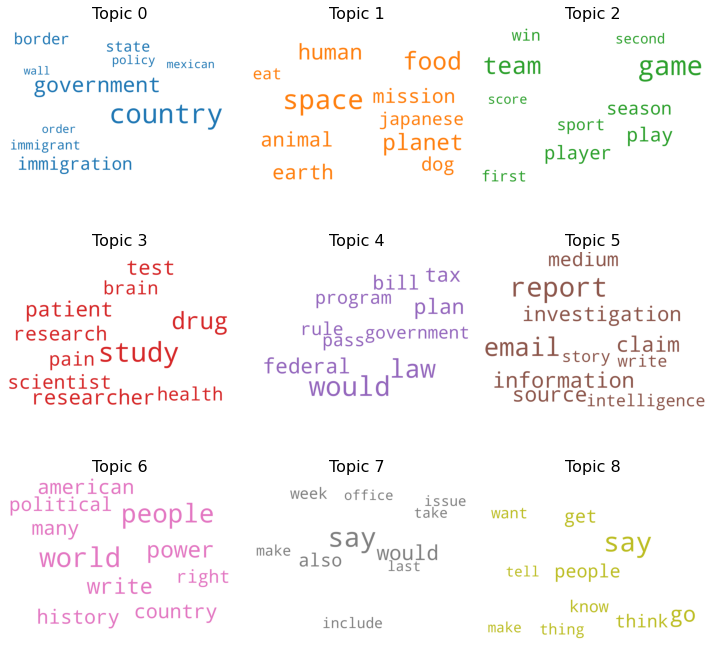

In [21]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
# https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#11.-Sentence-Chart-Colored-by-Topic